#About the project:
#Note:

1.***The dataset to be used is attrition.csv. This dataset reveals whether a particular employee left the company or not***.

2.***In this dataset, the column named Attrition is the target variable and the remaining columns are features. Please note that Attrition = 1 means the employee left the company, whereas Attrition = 0 means the opposite of this statement***. 


#Let's Import Some Important ML and Data Visualization Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#this is the url to the dataset
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


"**Let's see the basic description and info about the data**"

In [4]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [5]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


**Description based on Attrition**

In [6]:
#FOR ATTRITION = 1

In [7]:
attrition_data[attrition_data['Attrition']==1].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,172.000000,172.0,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,33.447674,1.0,760.656977,10.575581,2.779070,1.0,735.238372,2.430233,64.616279,2.482558,1.662791,2.517442,4860.058140,14648.069767,2.906977,15.238372,3.156977,2.610465,0.459302,8.220930,2.656977,2.662791,5.226744,2.970930,1.976744,2.924419,531.238372
std,9.960897,0.0,402.377138,8.601651,1.007587,0.0,420.047555,1.150039,19.665429,0.783409,0.992492,1.100100,3849.640789,7313.798814,2.730070,3.709658,0.364841,1.151915,0.789978,7.305211,1.339376,0.796343,6.086202,3.227128,3.271270,3.149322,298.077929
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.0,424.250000,3.000000,2.000000,1.0,373.000000,1.000000,48.000000,2.000000,1.000000,1.000000,2379.250000,9064.250000,1.000000,12.000000,3.000000,1.750000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,269.250000
50%,31.500000,1.0,701.000000,8.000000,3.000000,1.0,782.500000,2.500000,63.500000,3.000000,1.000000,3.000000,3343.500000,14569.500000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,564.000000
75%,39.000000,1.0,1097.000000,17.000000,4.000000,1.0,1086.000000,3.000000,81.250000,3.000000,2.000000,3.000000,5850.000000,21522.750000,5.000000,18.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000,782.250000
max,58.000000,1.0,1485.000000,29.000000,5.000000,1.0,1439.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,1021.000000


In [8]:
#FOR ATTRITION = 0

In [9]:
attrition_data[attrition_data['Attrition']==0].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,856.000000,856.0,856.000000,856.000000,856.000000,856.0,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,37.712617,0.0,815.773364,8.696262,2.892523,1.0,705.167056,2.778037,65.619159,2.781542,2.179907,2.806075,6988.733645,14162.245327,2.655374,15.158879,3.151869,2.757009,0.818925,12.059579,2.792056,2.783879,7.476636,4.523364,2.257009,4.385514,509.935748
std,9.178624,0.0,407.584306,7.937256,1.037379,0.0,418.270017,1.068325,20.401463,0.675510,1.150791,1.100669,4959.691465,6995.884611,2.484416,3.637105,0.359104,1.074673,0.832760,8.001898,1.294607,0.681431,6.298012,3.653010,3.291928,3.646801,296.712308
min,18.000000,0.0,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31.000000,0.0,471.750000,2.000000,2.000000,1.0,349.750000,2.000000,48.000000,2.000000,1.000000,2.000000,3199.750000,8031.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,254.750000
50%,36.000000,0.0,828.500000,7.000000,3.000000,1.0,689.500000,3.000000,65.500000,3.000000,2.000000,3.000000,5215.000000,13982.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,506.500000
75%,44.000000,0.0,1176.500000,11.250000,4.000000,1.0,1061.250000,4.000000,83.000000,3.000000,3.000000,4.000000,9401.750000,20213.000000,4.000000,18.000000,3.000000,4.000000,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,766.250000
max,60.000000,0.0,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26968.000000,9.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,1027.000000


**List of all the features**

In [10]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

#NOTE:
**We can see that many features are not numerical data like, 'Business Travel' etc.**
**Let's Analyse Them :**

#BusinessTravel

In [11]:
attrition_data['BusinessTravel'].head()

0        Travel_Rarely
1    Travel_Frequently
2        Travel_Rarely
3    Travel_Frequently
4        Travel_Rarely
Name: BusinessTravel, dtype: object

In [12]:
#Let's check all the categories possible

In [13]:
attrition_data['BusinessTravel'].value_counts()

Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [15]:
#SO, WE HAVE 3 CATEGORIES

#Let's Get Dummies of the same

In [20]:
b_travel = pd.get_dummies(data=attrition_data['BusinessTravel'],drop_first=True)

#NOTE: WE ARE USING DROP FIRST AS IF WE HAVE INFO ABOUT ANY 2 THAN WE DON'T NEED INFO ON 3RD

In [22]:
b_travel

,Travel_Frequently,Travel_Rarely
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
1023,0,1
1024,0,1
1025,0,1
1026,0,1


**Now, let's concat the data on our DATAFRAME**

In [23]:
df_new = pd.concat([attrition_data,b_travel],axis=1)

In [24]:
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Travel_Frequently,Travel_Rarely
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0,1


In [25]:
#NOW WE CAN DROP THE business travel columns

In [26]:
df_new.drop('BusinessTravel',axis=1,inplace=True)

In [27]:
df_new.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Travel_Frequently,Travel_Rarely
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0,1
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,1,0
2,37,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,0,1
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,1,0
4,27,0,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0,1


#Department

In [28]:
df_new['Department'].value_counts()

Research & Development    683
Sales                     309
Human Resources            36
Name: Department, dtype: int64

In [30]:
#SO, WE HAVE 3 DEPARTMENTS 

#We repeat the same steps as for BusinessTravel

In [31]:
#let's get the dummies for the same 
dep = pd.get_dummies(data=df_new['Department'],drop_first=True)
df_new = pd.concat([df_new,b_travel],axis=1)
df_new.drop('Department',axis=1,inplace=True)

In [32]:
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
0,41,1,1102,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1
1,49,0,279,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,1,0,1,0
2,37,1,1373,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,0,1,0,1
3,33,0,1392,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,1,0,1,0
4,27,0,591,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0,1,0,1


#1.EducationField
#2.Gender
#3.JobRole
#4.MaritalStatus




In [34]:
print("EducationField\n")
print(df_new['EducationField'].value_counts())
print('\n')
print("Gender\n")
print(df_new['Gender'].value_counts())
print('\n')
print("JobRole\n")
print(df_new['JobRole'].value_counts())
print('\n')
print("MaritalStatus\n")
print(df_new['MaritalStatus'].value_counts())

EducationField

Life Sciences       427
Medical             320
Marketing           119
Technical Degree     90
Other                57
Human Resources      15
Name: EducationField, dtype: int64


Gender

Male      597
Female    431
Name: Gender, dtype: int64


JobRole

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


MaritalStatus

Married     454
Single      342
Divorced    232
Name: MaritalStatus, dtype: int64


#Let's Get Dummies For All These Fields

In [35]:
multiple = pd.get_dummies(df_new[['EducationField','Gender','JobRole','MaritalStatus']],drop_first=True)

In [36]:
multiple.head()

,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


"We have successfully generated dummies for all the categories. Now, let's concat this to the main DataFrame"

In [38]:
df_new = pd.concat([df_new,multiple],axis=1)

In [40]:
#dropping the columns
df_new.drop(['EducationField','Gender','JobRole','MaritalStatus'],axis=1,inplace=True)

In [41]:
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [42]:
#there's still 1 column left
time = pd.get_dummies(data=df_new['OverTime'],drop_first=True)
df_new = pd.concat([df_new,time],axis=1)
df_new.drop('OverTime',axis=1,inplace=True)

In [43]:
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Yes
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,4,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


# our data is now ready

In [44]:
#Let's drop the id column and split it into the train and test dataset

In [47]:
df_new.drop('ID',axis=1,inplace=True)

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_new.drop('Attrition',axis=1),df_new['Attrition'],test_size=0.3,random_state=101)

#RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
pred = rfc.predict(X_test)

**Let's Check how well did our model do**

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Metrix\n")
print(confusion_matrix(pred,y_test))
print('\n')
print('Classification_Report\n')
print(classification_report(pred,y_test))

Confusion Metrix

[[252  46]
 [  2   9]]


Classification_Report

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       298
           1       0.16      0.82      0.27        11

    accuracy                           0.84       309
   macro avg       0.58      0.83      0.59       309
weighted avg       0.96      0.84      0.89       309



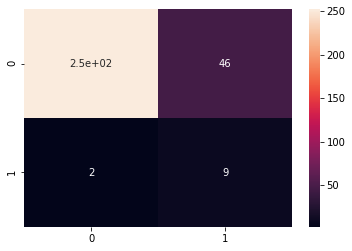

In [61]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

#Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
pred = nb.predict(X_test)

In [68]:
print("Confusion Metrix\n")
print(confusion_matrix(pred,y_test))
print('\n')
print('Classification_Report\n')
print(classification_report(pred,y_test))

Confusion Metrix

[[196  20]
 [ 58  35]]


Classification_Report

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       216
           1       0.64      0.38      0.47        93

    accuracy                           0.75       309
   macro avg       0.70      0.64      0.65       309
weighted avg       0.73      0.75      0.73       309



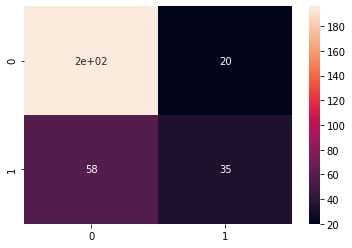

In [69]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

#THE END
#THANKS